In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().head(10)     # to check missing values (True if missing and False if not)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


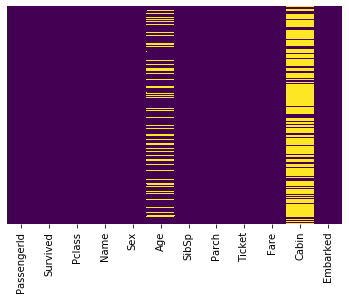

In [5]:
sns.heatmap(train.isnull(),yticklabels = False, cbar= False, cmap = 'viridis') 
# yticklabels: if true, shows the column names(on y axis)
# cbar: if true, shows the color bar (i,e scale)

## 1st step: Cleaning data by working on missing data

In [6]:
sns.set_style('whitegrid')

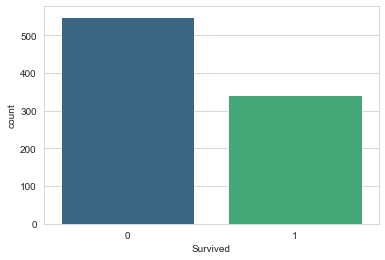

In [7]:
# count of people who survived 
sns.countplot(x = 'Survived', data = train, palette = 'viridis')

The '0' bar represents the number of people who could not survive and the '1' bar are the people who survived

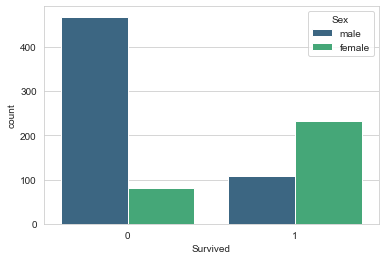

In [8]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex',palette = 'viridis')

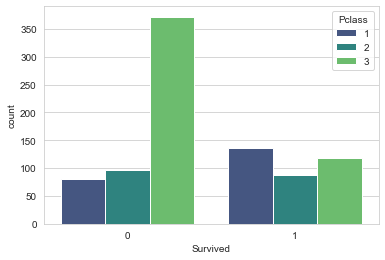

In [9]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass', palette = 'viridis')

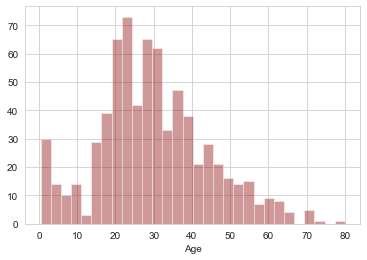

In [10]:
# age of people on-board
sns.distplot(train['Age'].dropna(), kde = False, color = 'darkred', bins = 30)

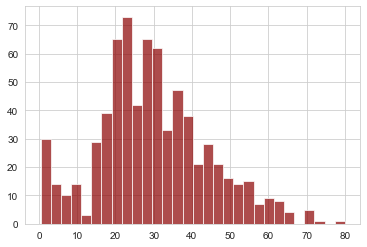

In [11]:
train['Age'].hist(color = 'darkred',bins = 30, alpha = 0.7 )

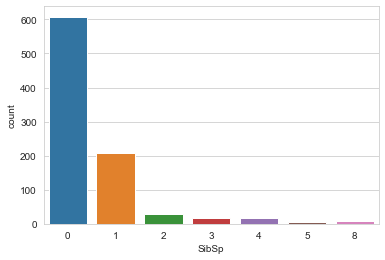

In [12]:
sns.countplot(x = 'SibSp', data = train)

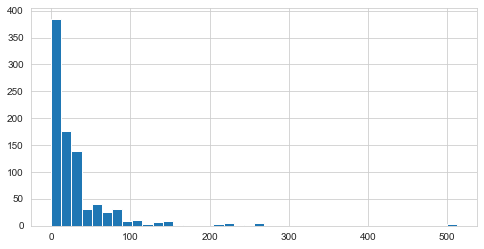

In [13]:
train['Fare'].hist(bins = 40, figsize = (8,4))

In [14]:
import cufflinks as cf

In [15]:
cf.go_offline()

In [16]:
train['Fare'].iplot(kind = 'hist', bins = 50)

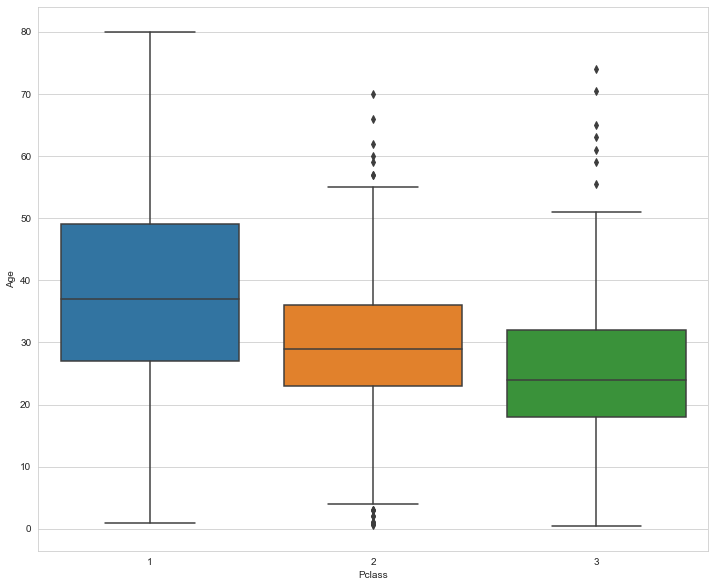

In [17]:
# age of people in respective pclass
plt.figure(figsize = (12,10))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

We want our model to predict the null ages based on the Pclass of the person. Therefore, we will make a function.

In [18]:
def impute_age(cols):    # here cols is a list whose 0th element is the Age and 1st element is the Pclass
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
    else:
        return age
            

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

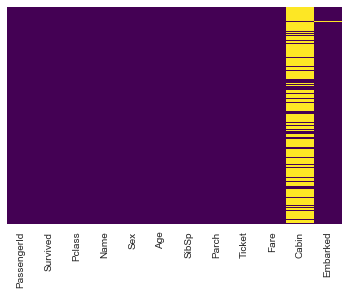

In [20]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

We will drop the Cabin column as the missing no. of data is quite huge in its case

In [21]:
train.drop('Cabin', axis = 1, inplace = True)

In [22]:
train.dropna(inplace=True)   # drops null values of embark

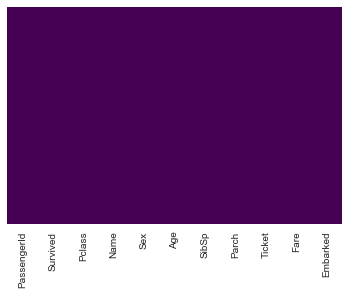

In [23]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 2nd step: Convert categorical features into dummy variables

In [25]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
# we droped the first column as it created the issue of multi_collinearity 

In [26]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
embarked = pd.get_dummies(train['Embarked'], drop_first = True)
# here we wont have mult-collinearity since all the columns are not the perfect predictors of another

In [28]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
train = pd.concat([train,sex,embarked], axis =1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [30]:
# drop all columns that are not useful for the model
train.drop(['Name','Sex','Ticket','Embarked'], axis = 1, inplace = True)

In [31]:
train.head()  # we will also drop passengerid since it just the index position

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
#train.drop(['PassengerId'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Creation of model

now we will perform the train-test split

In [33]:
X = train.drop(['Survived'], axis = 1)   # everything else than y
y = train['Survived']  # our target column( what we have to check)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

now we will train the model

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

now we will set predictions

In [65]:
predictions = logmodel.predict(X_test)

evalution of model for classification task

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [41]:
# we can even call for a confuion matrix
from sklearn.metrics import confusion_matrix

In [42]:
print(confusion_matrix(y_test, predictions))

[[151  12]
 [ 36  68]]


In [70]:
submission=pd.DataFrame()
submission['PassengerId'] = train['PassengerId']
submission['Survived'] = pd.Series(predictions)
#submission.to_csv('submissionrd.csv',index=False)
submission.head()

,PassengerId,Survived
0,1,0.0
1,2,0.0
2,3,1.0
3,4,1.0
4,5,0.0
